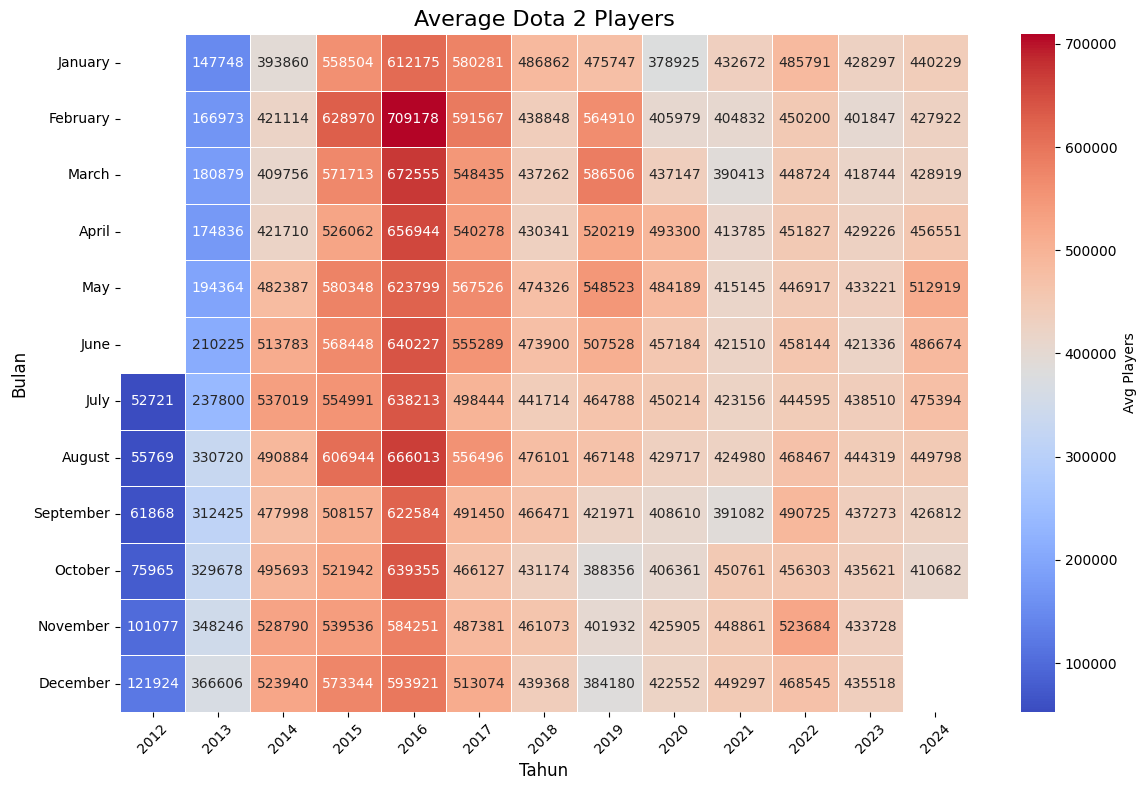

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('steamcharts_dota2.csv')
dataDF = data[data['Month'] != "Last 30 Days"].copy()  #keluarin last 30 days
dataDF[['Month Name', 'Year']] = dataDF['Month'].str.split(' ', expand=True) #membuat kolom baru untuk bulan dan tahun
dataDF['Avg. Players'] = pd.to_numeric(dataDF['Avg. Players'], errors='coerce') #ubah data avg player menjaid numerik

#pivot
pivot = dataDF.pivot_table(
    index='Month Name', columns='Year', values='Avg. Players', aggfunc='mean' #aggfunc berfungsi jika ada duplicate value maka akan menggunakan mean
)

#
bulan = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December" #membuat list untuk menentukan urutan bulan
]
pivot = pivot.reindex(bulan)


plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot, annot=True, fmt=".0f", cmap="coolwarm",
    linewidths=.5, cbar_kws={'label': 'Avg Players'}
)
plt.title("Average Dota 2 Players", fontsize=16)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Bulan", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()
